# CE-40959: Deep Learning

## HW2 - MLP / Optimization Algorithms /  Batch Normalization / Dropout (Numpy) [60pts]

### Deadline:   16 Esfand


Tha main purpose of this notebook is coding multilayer perceptron and concepts and techniques used it in from scratch in Numpy. This assignment could give you a great insight into how neural networks work.<br/>
Please read the codes and instructions given to you carefully.

In [1]:
# importing modules
import numpy as np
import os
import matplotlib.pyplot as plt
from load_data import load_cifar10
from models import MLP
from layers import *
from trainer import Trainer
from utils import plot
from optim import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# The following two lines let us reload external modules in the notebook
%load_ext autoreload
%autoreload 2

## Problem 1. Layers (12pts)

Open file `layers.py`. There you see some classes for typical layers used in neural networks. These layers include:

1. **`SoftmaxCrossEntropy`**: A module which represents the softmax activation function followed by a cross entropy loss function.

2. **`Relu`**: ReLU activation function

3. **`Sigmoid`**: Sigmoid activation function

4. **`Tanh`**: Tanh activation function

5. **`FullyConnected`**: Fully connected layer which multiplies the input by a weight matrix and adds a bias term to it

6. **`BatchNormalization`**: Batch Normalization layer

7. **`Dropout`**: Dropout layer

(**Note**: In reality, activation functions are not considered layers; However, here we do so just to make our implementations simpler.)

Batch Normalization and Dropout will be covered in problems 4 and 5. 
In this problem you have to implement `forward()` and `backward()` functions of the first five layers in the above list. 

Here are some tips that might help you:<br/>
**1)** Relu, Sigmoid, Tanh, and FullyConnected classes have been inherited from a base class called `Layer` which you can find in `utils.py`.<br/>
**2)** SoftmaxCrossEntropy class is inherited from `LossLayer` class in `utils.py`.<br/>
**3)** `backward()` function of layers takes a parameter called `dout`. `dout` is the gradient of loss w.r.t. the ouput of layer in the forward pass. Provided dout, you have to compute the gradient w.r.t. the inputs to the layer and parameters (if there is any) of the layer. For example in fully connected case, forward pass will output $Y=XW+b$ in which $W$ and $b$ are weights and biases. In the backward pass, dout is $\large{\frac{\partial{loss}}{\partial{y}}}$ and you have to compute $\large{\frac{\partial{loss}}{\partial{x}}}$ (i.e. gradient of loss w.r.t. the input) and $\large{\frac{\partial{loss}}{\partial{W}}}$ and $\large{\frac{\partial{loss}}{\partial{b}}}$ (i.e. gradient of loss w.r.t. the parameters).<br/>
**4)** For implementing backward pass, you may need some of the variables computed during forward pass; Save these variables in the `cache` attribute of the layer and use them in the backward pass.<br/>

### 1.1. ReLU

Implement `forward()` and `backward()` functions of `Relu` class corresponding to forward and backward pass of a ReLU activation function.

Let's test your implementation with the following function. You should see a small value as the output. We get outputs of orders 1e-8 and less.

In [2]:
from layers import *

def test_relu():
    np.random.seed(42)
    x = np.random.randn(6, 6)
    relu = Relu()
    print(relu)  # this function calls the __str__ method of relu
    
    output = relu.forward(x)
    correct_output = [[0.49671415, 0., 0.64768854, 1.52302986, 0., 0.],
                      [1.57921282, 0.76743473, 0., 0.54256004, 0., 0.],
                      [0.24196227, 0., 0., 0., 0., 0.31424733],
                      [0., 0., 1.46564877, 0., 0.0675282 , 0.],
                      [0., 0.11092259, 0., 0.37569802, 0., 0.],
                      [0., 1.85227818, 0., 0., 0.82254491, 0.]] 

    print('relative error forward pass:', np.linalg.norm(output - correct_output))
    
    dx = relu.backward(np.ones((6, 6), dtype=np.float32))
    correct_dx = [[1., 0., 1., 1., 0., 0.],
                 [1., 1., 0., 1., 0., 0.],
                 [1., 0., 0., 0., 0., 1.],
                 [0., 0., 1., 0., 1., 0.],
                 [0., 1., 0., 1., 0., 0.],
                 [0., 1., 0., 0., 1., 0.]]
    print('relative error backward pass:', np.linalg.norm(dx - correct_dx))
    
test_relu()

Relu
relative error forward pass: 1.0919702270554632e-08
relative error backward pass: 0.0


### 1.2. Sigmoid

Implement `forward()` and `backward()` functions of `Sigmoid` class corresponding to forward and backward pass of a Sigmoid activation function. Test your implementation with the following functions. The order of outputs should be 1e-8 or smaller.

In [3]:
from layers import *

def test_sigmoid():
    np.random.seed(42)
    x = np.random.randn(6, 6)
    sigmoid = Sigmoid()
    print(sigmoid)  # this function calls the __str__ method of sigmoid
    
    output = sigmoid.forward(x)
    correct_output = [[0.62168683, 0.46548889, 0.65648939, 0.82098421, 0.44172766, 0.44173171],
                      [0.829093,   0.68296571, 0.38474066, 0.63240775, 0.38617537, 0.38562745],
                      [0.56019716, 0.12861278, 0.1512388,  0.36301833, 0.26642616, 0.57792165],
                      [0.28740434, 0.19587096, 0.81239512, 0.44379448, 0.51687564, 0.1939183 ],
                      [0.36716864, 0.52770225, 0.24030765, 0.5928351,  0.35419759, 0.42758926],
                      [0.35395334, 0.86439437, 0.49662575, 0.25774714, 0.69477629, 0.22778802]]
    
    print('relative error forward pass:', np.linalg.norm(output - correct_output))
    
    dx = sigmoid.backward(np.ones((6, 6), dtype=np.float32))
    correct_dx = [[0.23519231, 0.24880898, 0.22551107, 0.14696914, 0.24660433, 0.24660481],
                  [0.14169779, 0.21652355, 0.23671528, 0.23246819, 0.23704395, 0.23691892],
                  [0.2463763,  0.11207153, 0.12836563, 0.23123602, 0.19544326, 0.24392822],
                  [0.20480309, 0.15750552, 0.15240929, 0.24684094, 0.24971521, 0.15631399],
                  [0.23235583, 0.24923259, 0.18255988, 0.24138164, 0.22874166, 0.24475668],
                  [0.22867037, 0.11721675, 0.24998861, 0.19131355, 0.2120622,  0.17590064]]
    
    print('relative error backward pass:', np.linalg.norm(dx - correct_dx))
    
test_sigmoid()

Sigmoid
relative error forward pass: 1.737191455760176e-08
relative error backward pass: 1.991348991130336e-08


### 1.3. Tanh

Implement `forward()` and `backward()` functions in `Tanh` class corresponding to forward and backward pass of Tanh activation function. Test your implementation with the following functions. The order of ouputs should be 1e-8 or smaller.

In [4]:
from layers import *

def test_tanh():
    np.random.seed(42)
    tanh = Tanh()
    print(tanh)  # this function calls the __str__ method of tanh
    print()
    
    x = np.random.randn(6, 6)
    output = tanh.forward(x)
    correct_output = [[ 0.45952909, -0.13738992,  0.57011185,  0.90922422, -0.22996582, -0.22995027],
                      [ 0.91847887,  0.64543531, -0.43777453,  0.49492338, -0.43286563, -0.43474259],
                      [ 0.23734834, -0.95736006, -0.93845248, -0.50967271, -0.76693046,  0.30429611],
                      [-0.72018252, -0.88798233,  0.89874415, -0.22201663,  0.06742575, -0.89058529],
                      [-0.49629835,  0.11046989, -0.81808296,  0.35896562, -0.53750389, -0.28369299],
                      [-0.53826284,  0.95196005, -0.01349641, -0.78478618,  0.67645264, -0.83990286]]
    print('relative error forward pass:', np.linalg.norm(output - correct_output))
    
    dx = tanh.backward(np.ones((6, 6), dtype=np.float32))
    correct_dx = [[0.78883302, 0.98112401, 0.67497248, 0.17331133, 0.94711572, 0.94712287],
                  [0.15639657, 0.58341325, 0.80835346, 0.75505085, 0.81262735, 0.81099888],
                  [0.94366577, 0.08346172, 0.11930694, 0.74023373, 0.41181767, 0.90740388],
                  [0.48133714, 0.21148737, 0.19225894, 0.95070862, 0.99545377, 0.20685785],
                  [0.75368795, 0.9877964,  0.33074027, 0.87114368, 0.71108957, 0.91951829],
                  [0.71027311, 0.09377206, 0.99981785, 0.38411065, 0.54241182, 0.29456319]]
    
    print('relative error backward pass:', np.linalg.norm(dx - correct_dx))
    
test_tanh()

Tanh

relative error forward pass: 1.6270668692478115e-08
relative error backward pass: 1.911665905032474e-08


### 1.4. Softmax activation with Cross Entropy loss
**NOTE**: Please solve the 4th problem in your theoretical assignment before coming to this problem.

You have to implement a numerically stable version of softmax in this problem.

Implement `forward()` and `backward()` function of SoftmaxCrossEntropy class corresponding to forward and backward pass of softmax activation followed by cross entropy loss. Test your implementation with the following functions. The order of ouputs should be 1e-8 or smaller.

In [5]:
from layers import *

def test_softmax_ce():
    np.random.seed(42)
    x = np.linspace(1000, 1012, num=24).reshape(6, 4)
    y = np.random.randint(0, 4, (6, ))
    
    softmax_ce = SoftmaxCrossEntropy()
    print(softmax_ce)
    print()

    loss = softmax_ce.forward(x, y)
    
    correct_loss = 1.2894173056369196
    print('loss relative error:', np.abs(loss - correct_loss))
    
    dx = softmax_ce.backward()
    correct_dx = [[ 0.01616907,  0.02724417, -0.12076146,  0.07734823],
                  [ 0.01616907,  0.02724417,  0.0459052,  -0.08931844],
                  [-0.1504976,   0.02724417,  0.0459052,   0.07734823],
                  [ 0.01616907,  0.02724417, -0.12076146,  0.07734823],
                  [ 0.01616907,  0.02724417, -0.12076146,  0.07734823],
                  [ 0.01616907,  0.02724417,  0.0459052,  -0.08931844]]
    print('dx relative error:', np.linalg.norm(dx - correct_dx))
    
test_softmax_ce()    

Softmax Cross-Entropy

loss relative error: 0.0
dx relative error: 1.8471606684843375e-08


### 1.5. Fully Connected
Implement `forward()` and `backward()` functions corresponding to forward and backward pass of a fully connected (or dense) layer.<br/> 
We have implemented `__init__()` constructor for you. As you can see in the constructor's code, a class called `Parameter`, which is defined in `utils.py`, is used to define the trainable parameters of the layer, which are weights and biases.
Each instance of Parameter class has three attributes:
* `name`: Name of the parameter.

* `data`: Which is a numpy ndarray holding the value of the parameter.

* `grad`: Numpy ndarray with the same shape as data which can hold the gradient of any scalar (perhaps the gradient of loss of a network) w.r.t. to the parameter.

This implementation of Parameter class is inspired by PyTorch. In PyTorch, each trainable parameter has two attributes `data` and `grad` which are same as what we defined above. You can easily access the gradient of loss w.r.t any parameter in the model by using `.grad` attribute in PyTorch which is a nice feature.

In the forward pass, You have to output $y=XW+b$ in which $W$ and $b$ are parameters of the layer. In the backward pass you get $\large{\frac{\partial{loss}}{\partial{y}}}$ as `dout`; You have to compute $\large{\frac{\partial{loss}}{\partial{X}}}$, $\large{\frac{\partial{loss}}{\partial{W}}}$ and $\large{\frac{\partial{loss}}{\partial{b}}}$ and save them in `dx`, `dW`, and `db`. The output of the `backward()` function will be `dx`. 

Note that a fully connected layer with the shape of weights $(D, K)$ represents a layer in a MLP with $K$ neurons (or units). In other words, it takes a $D$-dimensional input and gives back a $K$-dimensional ouput.

Test your implementation with the following functions. The order of ouputs should be 1e-8 or smaller.

In [6]:
from layers import *

def test_fc():
    np.random.seed(42)
    x = np.random.randn(6, 4)
    fc = FullyConnected(np.random.randn(4, 5), np.random.randn(5,), reg=1)
    print(fc)
    print()
    output = fc.forward(x)
    
    correct_output = [[-0.87601531, -0.24757263, -0.89217995, -0.19978873, -1.12732458],
                      [ 0.16729496, -1.96618239, -0.16346248, -2.21117722, -1.59665678],
                      [-1.85407562, -0.8765468,   0.90809297,  1.83542523,  0.80746895],
                      [-2.58166519,  2.14885268, -4.73969384,  4.61914848,  4.68230247],
                      [-2.04373664, -0.95565841,  0.85551959,  2.61512026,  2.25085578],
                      [-2.43547103, -1.55598986, -2.79584407,  1.64324759,  0.04140592]]
    
    print('relative error forward pass:', np.linalg.norm(output - correct_output))
    
    dout = np.random.randn(6, 5)
    dx = fc.backward(dout)
    dw = fc.get_params()['w'].grad  # extracting the computed gradient from grad attribute
    db = fc.get_params()['b'].grad
    
    correct_dx = [[ 0.81722937, -1.03185531, -1.41214133, -0.2796331 ],
                  [ 0.19283554, -2.76176528, -0.29821121,  0.68288306],
                  [-0.06768875,  0.94004309,  5.10548565,  0.29450477],
                  [-0.04919144, -1.58250136, -3.4493717,   0.92420572],
                  [-2.33223651,  1.16513771, -2.65853831, -0.06352658],
                  [ 1.24966937,  0.33783388, -2.67601111,  0.11308856]]
    print('relative error dx:', np.linalg.norm(dx - correct_dx))
    
    correct_dw = [[-5.65352614,  1.55646652, -3.65720983,  0.84782142, -1.77615563],
                  [-1.21756568, -4.39311611,  4.45500646, -2.32504454, -3.14751316],
                  [ 0.68660901, -3.15109143, -2.33743616, -6.05206413, -3.2210477 ],
                  [ 2.23215309,  0.46438382, -3.05703751, -1.07198279, -1.40310552]]
    print('relative error dw:', np.linalg.norm(dw - correct_dw))
    
    correct_db = [-2.20883454, 3.31572799, 0.14311473, -1.42376984, 1.76477355]
    print('relative error db:', np.linalg.norm(db - correct_db))
    
    
test_fc()

FullyConnected (4, 5)

relative error forward pass: 1.6179650488884747e-08
relative error dx: 1.1664121496881792e-08
relative error dw: 1.2237245847791592e-08
relative error db: 5.3857394261838744e-09


## Problem 2. Multi-layer perceptron (17pts)

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. A MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In this problem we aim to code a Multi-layer perceptron from scratch using Numpy. For training, We use CIFAR-10 (Canadian Institute For Advanced Research) dataset. This dataset is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

First, Let's load this dataset and visualize some samples of it.

### 2.1. Load and Visualize data

In [7]:
def load_data():
    dataset_dir = 'data/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_cifar10(dataset_dir)
    X_train, X_val = X_train[:49000], X_train[49000:]
    y_train, y_val = y_train[:49000], y_train[49000:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_data()

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (49000, 3072)
y_train shape: (49000,)
X_val shape: (1000, 3072)
y_val shape: (1000,)
X_test shape: (10000, 3072)
y_test shape: (10000,)


As you saw in your previous assignment, you can render and show a numpy array as an image with `plt.imshow()`. Let's visualize some of the images of different classes of CIFAR-10 dataset with the following code:

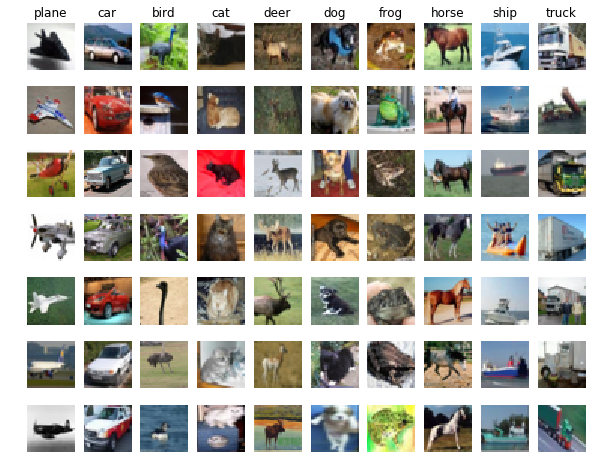

In [8]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 7

for i in range(10):
    idxs = np.where(y_train==i)[0]
    idxs = idxs[:samples_per_class]
    sample_imgs = X_train[idxs].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    
    for j, idx in enumerate(idxs):
        plt_idx = j * 10 + i + 1
        plt.subplot(samples_per_class, 10, plt_idx)
        plt.imshow(sample_imgs[j].astype('uint8'))
        if j == 0:
            plt.title(classes[i])
        plt.axis('off')

### 2.2. Preprocessing

Let's preprocess the data by subtracting the mean of training images from all images. Preprocessing can have a huge effect on the accuracy of your model in some cases.

In [9]:
# Preprocessing...
mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# Later you see that we pass the data as a dictionary to the trainer.
data = {'X_train': X_train,
        'X_val': X_val,
        'y_train': y_train, 
        'y_val': y_val}

### 2.3. MLP

Open `models.py`. In this file, there is a class called `MLP`. The `__init__()` constructor is implemented for you. As you can see, two attributes are defined in the constructor:

* `layers`: which is a Python list. This list keeps the layers of model in order. You can add a layer to the MLP model by calling `add()` method. This way of implementation is inspired by Keras, which is a popular machine learning framework due to its simple and user friendly functional API (Although working with Keras is so simple, it has many disadvantages that makes it inappropriate for scientific research in deep learning). 

* `mode`: As you may know, some layers such as dropout and batch normalization acts differently during train and test time. `mode` can take _train_ or _test_ which represents the state in which the model is. During forward pass, model can pass its mode to its layers so they will know how to act.

We have presented an example of using `add()` function to build a simple model with one FullyConnected layer, followed by a Simoid layer, followed by another FullyConnected layer, and a SoftmaxCrossEntropy layer at the end:

In [10]:
np.random.seed(42)
model = MLP()
layer1 = FullyConnected(np.random.randn(5, 3), np.zeros((3,)), reg=1)
model.add(layer1)
model.add(Sigmoid())
model.add(FullyConnected(np.random.randn(3, 4), np.zeros((4,)), reg=1))
model.add(SoftmaxCrossEntropy())

# printing the model would call the __str__ method which returns a nice and clean representation of the model.
print(model)

layer_0: FullyConnected (5, 3)
layer_1: Sigmoid
layer_2: FullyConnected (3, 4)
layer_3: Softmax Cross-Entropy


`model` represents a neural net with the following architecture (remember that in reality we do not consider activation functions as layers):

<img src="images/nn.png" style="width:600px;">

The above model is a "2-layer neural net" or "1-hidden layer neural net".<br>
Let's test the forward and backward pass of this model in the following part.

### 2.4. Forward and backward propagation

Open `models.py` and complete the code of `forward()` and `backward()` functions in `MLP` class.<br/>
Test your implementation with the following functions. The order of ouputs should be 1e-8 or smaller.

In [11]:
from models import MLP

def test_forward():
    np.random.seed(42)
    x = np.random.randn(5, 5)
    y = np.random.randint(0, 3, (5,))
    
    scores, loss = model.forward(x, y)
    print()
    correct_loss = 26.055862031276416
    correct_scores = [[-1.88392653, -0.30334005,  0.1948683,  -1.24757687],
                      [-1.29379092, -0.54112751,  0.24091086, -1.0471612 ],
                      [-2.84916141,  0.80152891, -0.07850706, -1.1594215 ],
                      [-2.76047051,  0.81863079, -0.08458085, -1.09828018],
                      [-2.72333303,  0.31137407,  0.04014704, -1.37453479]]
    print('relative error loss forward pass:', abs(loss - correct_loss))
    print('relative error scores forward pass:', np.linalg.norm(scores - correct_scores))
    

test_forward()


relative error loss forward pass: 0.0
relative error scores forward pass: 1.1604784765798088e-08


In [12]:
def test_backward():
    np.random.seed(42)
    x = np.random.randn(5, 5)
    y = np.random.randint(0, 4, (5,))
    
    scores, loss = model.forward(x, y)
    model.backward()
    dw1 = model.layers[0].params['w'].grad  # We can easily extract the gradient value from grad attribute after backward pass
    db1 = model.layers[0].params['b'].grad
    dw2 = model.layers[2].params['w'].grad
    db2 = model.layers[2].params['b'].grad
    
    dw1_correct = [[ 0.93268871, -0.24172384,  1.2687144 ],
                   [ 3.05343287, -0.46772624, -0.50131806],
                   [ 3.14256752,  1.56734785, -0.9592566 ],
                   [ 1.12419013, -0.94966375, -0.97128763],
                   [ 0.51168204, -3.86075465, -3.47590091]]
    db1_correct = [-0.06011489,  0.07719651, -0.02458404]
    dw2_correct = [[-1.13382322, -1.85921465,  0.41182971, -1.75658262],
                   [-3.19188527,  3.31426257, -0.54191021,  0.20972685],
                   [-3.20972637, -0.72016755,  0.14637705, -2.23488693]]
    db2_correct = [-0.35354211,  0.4619053,  -0.21565033,  0.10728714]
    
    print('relative error dw1:', np.linalg.norm(dw1 - dw1_correct))
    print('relative error db1:', np.linalg.norm(db1 - db1_correct))
    print('relative error dw2:', np.linalg.norm(dw2 - dw2_correct))
    print('relative error db2:', np.linalg.norm(db2 - db2_correct))
    
test_backward()

relative error dw1: 1.2676352819710184e-08
relative error db1: 4.715633893730543e-09
relative error dw2: 9.74687808839534e-09
relative error db2: 6.785125017162569e-09


## 2.5. A higher level wrapper for MLP class

As the number of layers inrease, it gets annoying if we want to add each layer of the MLP manually when creating  it. In the following problems in this notebook, we mostly work with MLP models with a number of FullyConnected layers with Relu as the activation function and SoftmaxCrossEntropy as the last loss layer. It would be much easier if we could define such models only by  specifying the input dimension, number of units in the hidden layers, and the ouput dimension. We can also use the same weight scale and regularization strength for the weights of the layers too.<br/>
You have to complete the code of following function to do this task.

In [13]:
def get_model(hidden_dims, input_dim=3*32*32, output_dim=10, reg=0.0, weight_scale=1e-2):
    '''
    hidden_dims: A Python list of integers giving the size of each hidden layer.
    input_dim: Number of units in the input layer.
    output_dim: Number of units in the output layer. 
    reg: regularization strength for the weights of fully connected layers.
    weight_scale: standard deviation of weights of fully connected layers.
    '''
    model = MLP()
    model.add(FullyConnected(np.random.normal(0, weight_scale, (input_dim, hidden_dims[0])), 
                             np.zeros((hidden_dims[0],)), reg=reg))
    model.add(Relu())
    for i in range(0,len(hidden_dims) - 1):
        model.add(FullyConnected(np.random.normal(0, weight_scale, (hidden_dims[i], hidden_dims[i + 1])), 
                                 np.zeros((hidden_dims[i + 1],)), reg=reg))
        model.add(Relu())
    model.add(FullyConnected(np.random.normal(0, weight_scale, (hidden_dims[-1],output_dim)), 
                             np.zeros((output_dim,)), reg=reg))
    model.add(SoftmaxCrossEntropy())

    return model

Let's test if your implementation of `get_model()` gets the right output. You have to get no errors.

In [14]:
test_model = get_model([1, 2, 3, 4], input_dim=5, output_dim=10, reg=0.2, weight_scale=1e-2)

assert len(test_model.layers) == 10
assert test_model.layers[0].params['w'].data.shape[0] == 5
assert test_model.layers[8].params['w'].data.shape[1] == 10
assert isinstance(test_model.layers[7], Relu)
assert isinstance(test_model.layers[-1], SoftmaxCrossEntropy)
assert test_model.layers[2].get_reg() == 0.2

### 2.6. Trainer
Following a modular design, we have splitted the logic for training models into a separate class called `Trainer` which is implemented for you in `trainer.py`. Training a model is done by an instance of Trainer class. Please read the implementation of this class and familiarize yourself with its functional API.<br/> 

For now, we use stochastic gradeint descent optimizer to train the models. We have provided the code of this 
optimization algorithm in `sgd` function in `optim.py` for you. While training, after each training step, an optimizer will be called by trainer instance to update the parameters of the model.


### 2.7. Overfitting on a small dataset

It is useful sometimes to test your model on a very small dataset to check whether it can overfit on the dataset or not. This practice you lets you know if the model has enough learning capacity. As a sanity check, Let's train a model on a tiny sample of CIFAR-10 dataset. In the following cell, tweak the learning rate and weight scale to overfit and achieve 100% training accuracy within 20 epochs. If your model does not get an accuracy of 100% on this small dataset, there is a bug in your code. 

In [15]:
# making a small dataset
np.random.seed(42)
num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

learning_rate, weight_scale = 0.001, 0.05
trainer = None
model = get_model([100, 100], 3072, 10, 0.0, weight_scale)
trainer = Trainer(model, small_data, batch_size = 25, num_epochs = 20 ,update_rule = 'sgd', optim_config = {"learning_rate":learning_rate})
trainer.train()

(Iteration 1 / 40) loss: 25.797845
(Epoch 0 / 20) train acc: 24.00%; val_acc: 10.80%
(Epoch 1 / 20) train acc: 34.00%; val_acc: 12.20%
(Epoch 2 / 20) train acc: 50.00%; val_acc: 14.90%
(Epoch 3 / 20) train acc: 58.00%; val_acc: 13.40%
(Epoch 4 / 20) train acc: 78.00%; val_acc: 13.80%
(Epoch 5 / 20) train acc: 82.00%; val_acc: 13.30%
(Epoch 6 / 20) train acc: 92.00%; val_acc: 13.50%
(Epoch 7 / 20) train acc: 98.00%; val_acc: 12.40%
(Epoch 8 / 20) train acc: 100.00%; val_acc: 13.30%
(Epoch 9 / 20) train acc: 100.00%; val_acc: 13.30%
(Epoch 10 / 20) train acc: 100.00%; val_acc: 13.50%
(Epoch 11 / 20) train acc: 100.00%; val_acc: 13.40%
(Epoch 12 / 20) train acc: 100.00%; val_acc: 13.50%
(Epoch 13 / 20) train acc: 100.00%; val_acc: 13.50%
(Epoch 14 / 20) train acc: 100.00%; val_acc: 13.60%
(Epoch 15 / 20) train acc: 100.00%; val_acc: 13.70%
(Epoch 16 / 20) train acc: 100.00%; val_acc: 13.70%
(Epoch 17 / 20) train acc: 100.00%; val_acc: 13.80%
(Epoch 18 / 20) train acc: 100.00%; val_acc: 13

Let's plot your training loss with the following code snippet. Note that the training loss history has been saved in `trainer.loss_history`.

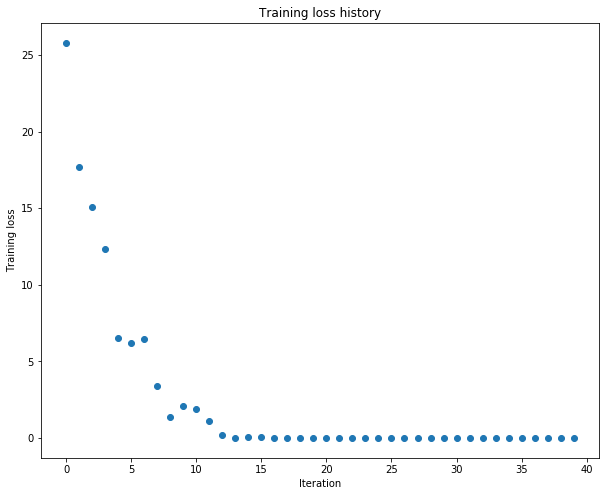

In [16]:
from utils import plot
plot('Training loss history', 'Iteration', 'Training loss', [trainer.loss_history], marker='o')

### 2.8. Training a model on CIFAR-10 dataset

Now, let's train a model on whole CIFAR-10 dataset. You have to tweak `hidden_dim`, `leanirng_rate`, `weight_scale`, `num_epochs` and `reg` to get a validation accuracy above 50%.

In [17]:
np.random.seed(42)
data = {
  'X_train': data['X_train'],
  'y_train': data['y_train'],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
model = MLP()
reg, learning_rate, weight_scale, num_epochs = 0.8, 0.001,  0.05, 20
hidden_dim = 100
model = get_model([hidden_dim], 3072, 10, reg, weight_scale)
trainer = Trainer(model, data, batch_size = 256, num_epochs = num_epochs ,update_rule = 'sgd', optim_config = {"learning_rate":learning_rate})
trainer.train()

(Iteration 1 / 3820) loss: 721.749954
(Epoch 0 / 20) train acc: 16.80%; val_acc: 16.10%
(Iteration 101 / 3820) loss: 453.420861
(Epoch 1 / 20) train acc: 19.50%; val_acc: 20.90%
(Iteration 201 / 3820) loss: 328.554277
(Iteration 301 / 3820) loss: 236.330039
(Epoch 2 / 20) train acc: 25.00%; val_acc: 28.10%
(Iteration 401 / 3820) loss: 170.342098
(Iteration 501 / 3820) loss: 123.591911
(Epoch 3 / 20) train acc: 33.70%; val_acc: 35.90%
(Iteration 601 / 3820) loss: 90.120321
(Iteration 701 / 3820) loss: 65.877525
(Epoch 4 / 20) train acc: 41.90%; val_acc: 36.80%
(Iteration 801 / 3820) loss: 48.244601
(Iteration 901 / 3820) loss: 35.344990
(Epoch 5 / 20) train acc: 43.00%; val_acc: 41.20%
(Iteration 1001 / 3820) loss: 26.228627
(Iteration 1101 / 3820) loss: 19.463790
(Epoch 6 / 20) train acc: 46.30%; val_acc: 42.20%
(Iteration 1201 / 3820) loss: 14.503532
(Iteration 1301 / 3820) loss: 11.036841
(Epoch 7 / 20) train acc: 48.20%; val_acc: 44.60%
(Iteration 1401 / 3820) loss: 8.434406
(Iterat

Let's check accuracy of model's predictions on training set, validation set, and test set after training.
You have to get above 50% accuracy for training and validation sets (We also recommend you to try to get above 50% accuracy on test set, though it is not mandatory.)

In [18]:
print(trainer.check_accuracy(X_train, y_train) * 100, "%")
print(trainer.check_accuracy(X_val, y_val)* 100, "%")
print(trainer.check_accuracy(X_test, y_test)* 100, "%")

53.10816326530612 %
51.1 %
49.91 %


Now let's plot the results. After runnning the following cell, You should see the value of loss decreasing during iterations and accuracy increasing during epochs.

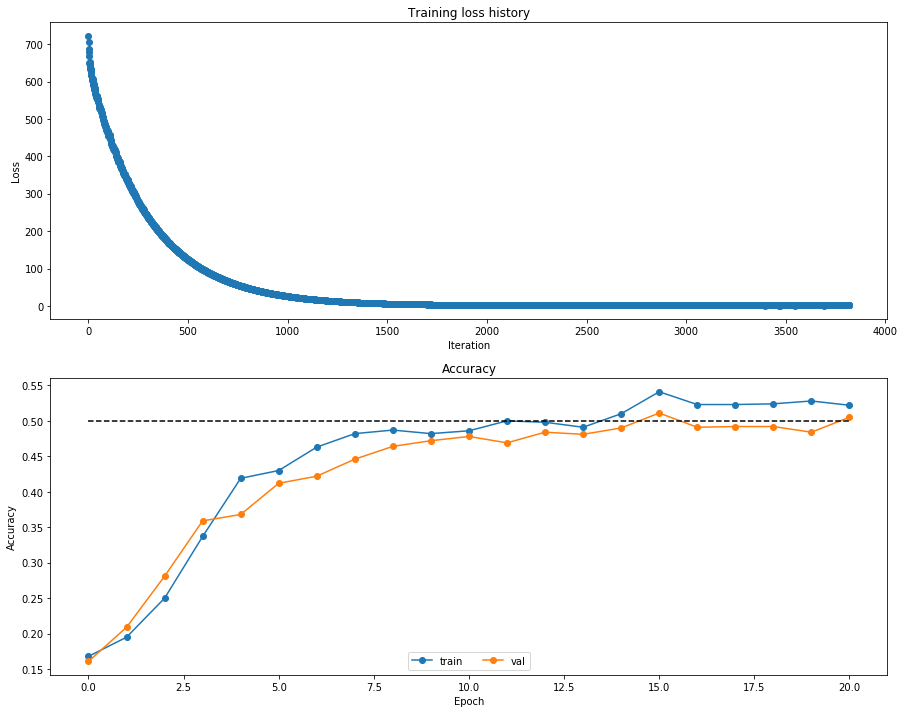

In [19]:
from utils import plot

plt.subplot(2, 1, 1)
plot('Training loss history','Iteration', 'Loss', plots=[trainer.loss_history], marker='o')

plt.subplot(2, 1, 2)
plot('Accuracy','Epoch', 'Accuracy', [trainer.train_acc_history, trainer.val_acc_history], marker='-o', 
    labels=['train', 'val'])
plt.plot([0.5] * len(trainer.val_acc_history), 'k--')
plt.gcf().set_size_inches(15, 12)

## Problem 3. Different Optimization Algorithms (10pts)

### 3.1. SGD + Momentum

Please read the following tutorial about different optimization algorithms first:
http://cs231n.github.io/neural-networks-3/#sgd

Open `optim.py` implement `sgd_momentum` optimization algorithm.

Let's test your implementation with the following function. The order of ouputs should be 1e-8 or smaller.

In [20]:
def test_sgd_momentum():
    N, D = 4, 5
    np.random.seed(42)
    param = np.random.randn(4, 5)
    dparam = np.random.randn(4, 5)
    v = np.random.randn(4, 5)

    config = {'learning_rate': 1e-3, 'velocity': v}
    next_param, _ = sgd_momentum(param, dparam, config=config)

    correct_next_param = [[ 1.15986843,  0.01619293,  0.54353756,  1.25346128, -1.56427878],
                       [-0.88210767,  1.16578892,  1.71846903, -0.15961729, -1.0438844 ],
                       [-0.17114041, -0.81415608, -0.36725403, -1.36171387, -0.79784081],
                       [ 0.27708542, -1.76833575,  0.03791586, -0.6085588,  -0.53450995]]
    correct_velocity = [[ 0.66315427,  0.15445723, -0.10415098, -0.26956858, -1.33012541],
                         [-0.64797071, -0.4134239,   0.95103431,  0.3098571,  -1.58644445],
                         [ 0.29227728, -0.34842633, -0.6092163,   0.55156637,  0.92707703],
                         [ 0.83937295, -0.75550463, -0.27633147,  0.29946527,  0.87779375]]

    # Should see relative errors around e-8 or less
    print('next_param relative error:', np.linalg.norm(next_param - correct_next_param))
    print('velocity error: ', np.linalg.norm(correct_velocity - config['velocity']))

test_sgd_momentum()

next_param relative error: 1.5030324751669356e-08
velocity error:  1.2023912955784942e-08


Now let's train two models with the same architectures, but one with `SGD` optimizer and the other with `SGD + Momentum`.

running with sgd
(Iteration 1 / 200) loss: 4.766566
(Epoch 0 / 5) train acc: 9.50%; val_acc: 11.20%
(Epoch 1 / 5) train acc: 20.40%; val_acc: 16.10%
(Epoch 2 / 5) train acc: 24.60%; val_acc: 20.50%
(Iteration 101 / 200) loss: 2.073158
(Epoch 3 / 5) train acc: 25.60%; val_acc: 23.20%
(Epoch 4 / 5) train acc: 32.30%; val_acc: 24.30%
(Epoch 5 / 5) train acc: 33.00%; val_acc: 25.20%

running with sgd_momentum
(Iteration 1 / 200) loss: 4.766566
(Epoch 0 / 5) train acc: 9.50%; val_acc: 11.20%
(Epoch 1 / 5) train acc: 31.60%; val_acc: 27.90%
(Epoch 2 / 5) train acc: 36.10%; val_acc: 29.90%
(Iteration 101 / 200) loss: 1.587402
(Epoch 3 / 5) train acc: 42.90%; val_acc: 32.00%
(Epoch 4 / 5) train acc: 45.90%; val_acc: 32.20%
(Epoch 5 / 5) train acc: 50.80%; val_acc: 32.40%



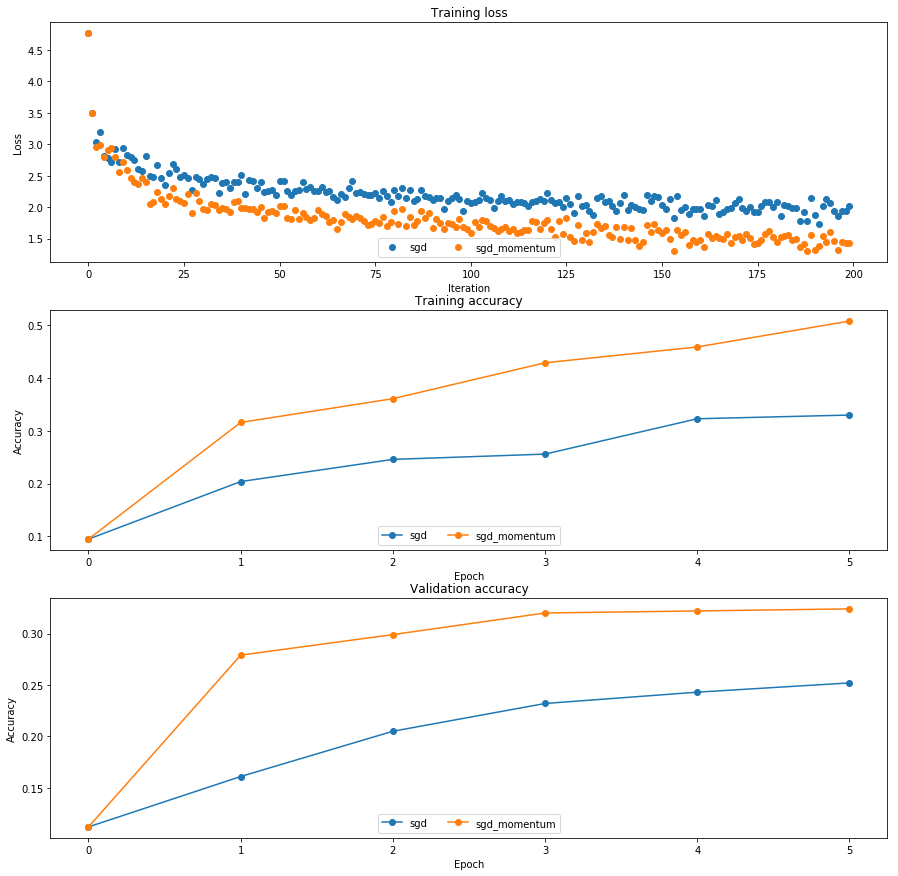

In [21]:
num_train = 4000
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}

trainers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    np.random.seed(42)
    print('running with', update_rule)
    trainer, model = None, None
    model = get_model([100, 100, 100, 100], 3072, 10, 0.0, 5e-2)
    trainer = Trainer(model, small_data, batch_size = 100, num_epochs = 5 ,update_rule = update_rule, optim_config = {"learning_rate":1e-3})
    trainer.train()
    # saving trainer to a dictionry
    trainers[update_rule] = trainer
    print()

labels = [label for label in trainers.keys()]

plt.subplot(3, 1, 1)
plots = [trainer.loss_history for trainer in trainers.values()]
plot('Training loss', 'Iteration', 'Loss', plots, marker='o', labels=labels)

plt.subplot(3, 1, 2)
plots = [trainer.train_acc_history for trainer in trainers.values()]
plot('Training accuracy', 'Epoch', 'Accuracy', plots, marker='-o', labels=labels)

plt.subplot(3, 1, 3)
plots = [trainer.val_acc_history for trainer in trainers.values()]
plot('Validation accuracy', 'Epoch', 'Accuracy', plots, marker='-o', labels=labels)

plt.gcf().set_size_inches(15, 15)

### Question: What do you see in the plots? Write the answer based on your knowledge about SGD and SGD + Momentum. 

### Answer: 
Obviosly SGD + Momentum is better than SGD for finding the answer for this data because it can get closer to local minimum faster and it means in SGD + Momentum the loss is lower than SGD.

### 3.2. RMSProp and Adam

Implement `rmsprop` and `adam` optimization algorithm too and test your implementation with the following functions. The order of ouputs should be 1e-8 or smaller.

In [22]:
def test_rmsprop():
    param = np.linspace(-0.4, 0.6, 20).reshape(4, 5)
    dparam = np.linspace(-0.6, 0.4, 20).reshape(4, 5)
    cache = np.linspace(0.6, 0.9, 20).reshape(4, 5)
    config = {'learning_rate': 1e-2, 'cache': cache}
    next_param, _ = rmsprop(param, dparam, config=config)
    
    
    correct_next_param = np.array([[-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
                               [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
                               [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
                               [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
    correct_cache = np.array([[ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
                               [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
                               [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
                               [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])
    
    # You should see relative errors around e-7 or less
    print('next_param relative error: ', np.linalg.norm(correct_next_param - next_param))
    print('cache relative error: ', np.linalg.norm(correct_cache - config['cache']))
    
test_rmsprop()

next_param relative error:  1.2223797093153516e-08
cache relative error:  9.122451874564293e-09


In [23]:
def test_adam():
    param = np.linspace(-0.4, 0.6, 20).reshape(4, 5)
    dparam = np.linspace(-0.6, 0.4, 20).reshape(4, 5)
    m = np.linspace(0.6, 0.9, 20).reshape(4, 5)
    v = np.linspace(0.7, 0.5, 20).reshape(4, 5)

    config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
    next_param, _ = adam(param, dparam, config=config)

    correct_next_param = np.array([[-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
                                [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
                                [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
                                [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
    correct_v = np.array([[ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
                           [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
                           [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
                           [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
    correct_m = np.array([[ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
                           [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
                           [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
                           [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

    # You should see relative errors around e-7 or less
    print('next_param error: ', np.linalg.norm(correct_next_param - next_param))
    print('v error: ', np.linalg.norm(correct_v - config['v']))
    print('m error: ', np.linalg.norm(correct_m - config['m']))
    

test_adam()

next_param error:  1.1494351223179928e-08
v error:  1.2584167609466704e-08
m error:  1.2565617293289218e-08


### 3.3. Training with RMSProp and Adam

Let's train two models with RMSProp and Adam optimizers respectively and compare the results with the previous moels trained with SGD and SGD + Momentum.

running with adam
(Iteration 1 / 200) loss: 4.766566
(Epoch 0 / 5) train acc: 10.10%; val_acc: 11.00%
(Epoch 1 / 5) train acc: 37.40%; val_acc: 29.50%
(Epoch 2 / 5) train acc: 44.90%; val_acc: 34.10%
(Iteration 101 / 200) loss: 1.340772
(Epoch 3 / 5) train acc: 51.70%; val_acc: 33.50%
(Epoch 4 / 5) train acc: 56.60%; val_acc: 35.40%
(Epoch 5 / 5) train acc: 62.70%; val_acc: 35.60%
running with rmsprop
(Iteration 1 / 200) loss: 4.766566
(Epoch 0 / 5) train acc: 10.60%; val_acc: 11.90%
(Epoch 1 / 5) train acc: 33.90%; val_acc: 26.80%
(Epoch 2 / 5) train acc: 36.80%; val_acc: 30.30%
(Iteration 101 / 200) loss: 1.649446
(Epoch 3 / 5) train acc: 44.60%; val_acc: 32.20%
(Epoch 4 / 5) train acc: 47.80%; val_acc: 32.50%
(Epoch 5 / 5) train acc: 49.00%; val_acc: 33.30%


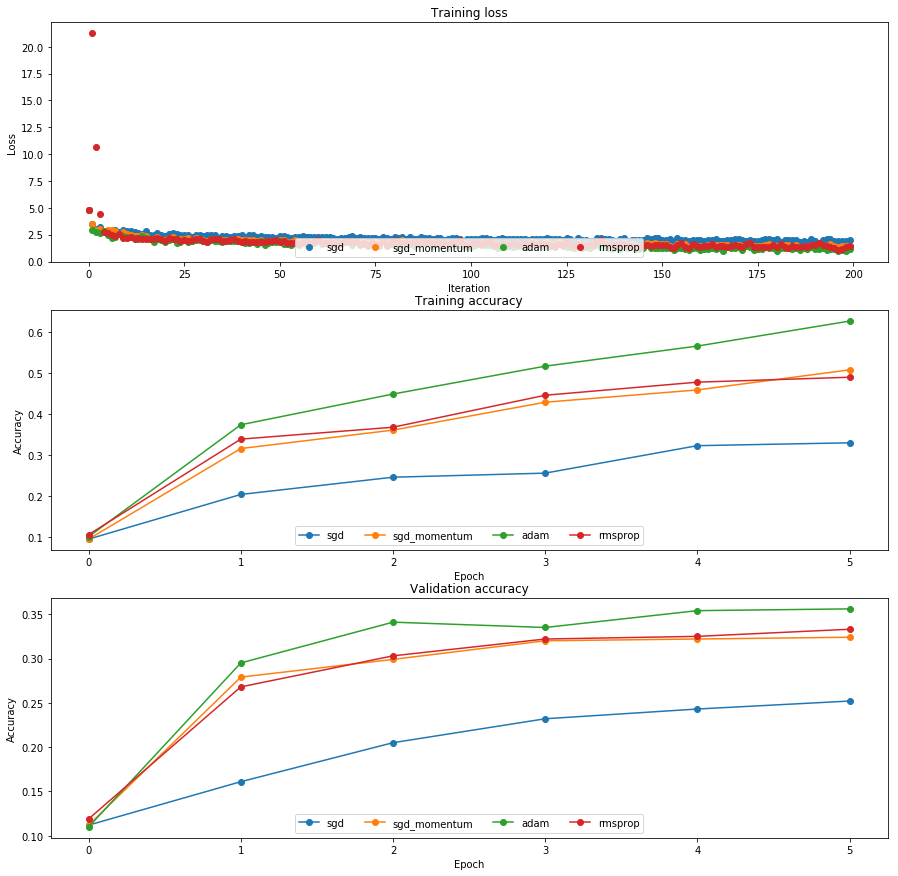

In [24]:
# NOTE: Make sure you have run the code cell in which you trained two models for sgd and sgd momentum 
# before running this cell. 

learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}

for update_rule in ['adam', 'rmsprop']:
    np.random.seed(42)
    model = None
    trainer = None
    print('running with', update_rule)
    model = get_model([100, 100, 100, 100], 3072, 10, 0.0, 5e-2)
    trainer = Trainer(model, small_data, batch_size = 100, num_epochs = 5 ,update_rule = update_rule, optim_config = {"learning_rate":1e-3})
    trainer.train()

    # saving the trainer in the dictionary
    trainers[update_rule] = trainer
    

labels = [label for label in trainers.keys()]

plt.subplot(3, 1, 1)
plots = [trainer.loss_history for trainer in trainers.values()]
plot('Training loss', 'Iteration', 'Loss', plots, marker='o', labels=labels)

plt.subplot(3, 1, 2)
plots = [trainer.train_acc_history for trainer in trainers.values()]
plot('Training accuracy', 'Epoch', 'Accuracy', plots, marker='-o', labels=labels)

plt.subplot(3, 1, 3)
plots = [trainer.val_acc_history for trainer in trainers.values()]
plot('Validation accuracy', 'Epoch', 'Accuracy', plots, marker='-o', labels=labels)

plt.gcf().set_size_inches(15, 15)

You have to see loss and accuracies for four optimization rules (sgd, sgd_momentum, adam, and rmsprop) in the above plots.

### Question: Please explain what you see in the plots. Do the curves look like what you expect?

**Answer:**
Adam algorithem has the best response to data. rmsprop and sgd_momentum are similary react to the data and they catch the same accurecy but rmsprop is a little better than sgd_momentum in validation data. sgd is the worst algorithm because the step in this algorithm is really small.

## Problem 4. Batch Normalization (13pts)

### 4.1. Forward pass

Open `layers.py` and implement `forward()` function of `BatchNormalization` class correpsonding to training and test time forward pass of Batch Normalization. test your implementations with the following function. The order of our ouputs is 1e-8.

In [25]:
from layers import *

def test_bn_forward_train():
    np.random.seed(42)
    x = np.random.randn(6, 4)
    gamma = np.random.randn(4)
    beta = np.random.randn(4)
    batchnorm = BatchNormalization(gamma, beta)
    x_normal = batchnorm.forward(x, mode='TRAIN')
    
    correct_x_normal = [[-0.88803363, -0.27232867, -1.44489514,  2.47097671],
                        [-0.38238592, -0.28583002, -2.45015153,  2.20914808],
                        [-0.21958004, -0.17645094, -0.24584252,  1.78183222],
                        [-0.71178458, -0.52229695,  1.11550802,  1.74837305],
                        [ 0.1563391,  -0.20860329,  0.2339554,   1.45382565],
                        [-1.55838708, -0.28465263, -0.8188139,   1.44951339]]

    print('realtive error normalized x:', np.linalg.norm(x_normal - correct_x_normal))

test_bn_forward_train()

realtive error normalized x: 1.523596158160703e-08


In [26]:
from layers import *

def test_bn_forward_test():
    np.random.seed(42)

    N, D1, D2 = 4, 5, 6
    W1 = np.random.randn(D1, D2)
    gamma, beta = np.random.randn(D2), np.random.randn(D2)

    batchnorm = BatchNormalization(gamma, beta)
    
    for t in range(50):
        X = np.random.randn(N, D1)
        a = np.maximum(0, np.matmul(X, W1))
        batchnorm.forward(a, mode='TRAIN')

    X = np.random.randn(N, D1)
    a = np.maximum(0, np.matmul(X, W1))
    a_norm = batchnorm.forward(a, mode='TEST')
    
    correct_a_norm = [[ 0.72804879, -3.24597888, -1.33408088, -1.1545589,   0.14165975,  1.04074376],
                      [-0.63516079, -3.24597888, -1.31758465,  0.961071,    0.14165975, -0.54325635],
                      [ 0.02812461,  0.69456439, -1.31961521, -0.65186876,  0.5919155,   0.05516815],
                      [-0.61444381, -3.24597888, -1.37635314, -0.29181439,  2.63674026,  1.04074376]]
    print('relative error:', np.linalg.norm(a_norm - correct_a_norm))

test_bn_forward_test()

relative error: 1.2900998541385832e-08


### 4.2. Backward pass

Implement `backward()` function of `BatchNormalization` class. Test your implementation with the following function.

In [27]:
from layers import *

def test_bn_backward():
    np.random.seed(42)
    N, D = 4, 5
    x = 2 * np.random.randn(N, D) + 3

    gamma_initial_value = np.random.randn(D)
    beta_initial_value = np.random.randn(D)
    batchnorm = BatchNormalization(gamma_initial_value, beta_initial_value)
        
    dout = np.random.randn(N, D)
    out = batchnorm.forward(x, mode='TRAIN')
    dx = batchnorm.backward(dout)
    
    correct_dx = [[ 0.25497926, -0.16610093,  0.12296819, -0.04656401, -0.267711  ],
                  [-1.39433282,  0.05078995, -0.10910854,  0.42768713,  0.15587129],
                  [ 1.89663567,  0.02488831, -0.11673825,  0.07397203, -0.03420708],
                  [-0.75728212,  0.09042267,  0.1028786,  -0.45509516,  0.14604679]]
    
    print('relative error dx:', np.linalg.norm(dx - correct_dx))

test_bn_backward()

relative error dx: 1.3229045494416273e-08


### 4.3. Deep networks with Batch Normalization

In [28]:
np.random.seed(42)

num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
bn_model, bn_trainer = None, None
weight_scale = 2e-2
gamma = 1
beta = 0
bn_model = MLP()
bn_model.add(FullyConnected(np.random.normal(0, weight_scale, (3072, 100)), np.zeros((100,))))
bn_model.add(BatchNormalization(np.ones(100),np.zeros(100)))
bn_model.add(Relu())

bn_model.add(FullyConnected(np.random.normal(0, weight_scale, (100, 100)), np.zeros((100,))))
bn_model.add(BatchNormalization(np.ones(100),np.zeros(100)))
bn_model.add(Relu())

bn_model.add(FullyConnected(np.random.normal(0, weight_scale, (100, 100)), np.zeros((100,))))
bn_model.add(BatchNormalization(np.ones(100),np.zeros(100)))
bn_model.add(Relu())

bn_model.add(FullyConnected(np.random.normal(0, weight_scale, (100, 100)), np.zeros((100,))))
bn_model.add(BatchNormalization(np.ones(100),np.zeros(100)))
bn_model.add(Relu())

bn_model.add(FullyConnected(np.random.randn(100, 10), np.zeros((10,))))
bn_model.add(SoftmaxCrossEntropy())

bn_trainer = Trainer(bn_model, small_data, batch_size = 50, num_epochs = 10 ,update_rule = 'adam', optim_config = {"learning_rate":4e-3}, verbose = True, print_every = 100)
bn_trainer.train()

pass

np.random.seed(42)
model, trainer = None, None
model = MLP()
model.add(FullyConnected(np.random.normal(0, weight_scale, (3072, 100)), np.zeros((100,))))
model.add(Relu())

model.add(FullyConnected(np.random.normal(0, weight_scale, (100, 100)), np.zeros((100,))))
model.add(Relu())

model.add(FullyConnected(np.random.normal(0, weight_scale, (100, 100)), np.zeros((100,))))
model.add(Relu())

model.add(FullyConnected(np.random.normal(0, weight_scale, (100, 100)), np.zeros((100,))))
model.add(Relu())

model.add(FullyConnected(np.random.randn(100, 10), np.zeros((10,))))
model.add(SoftmaxCrossEntropy())

trainer = Trainer(model, small_data, batch_size = 50, num_epochs = 10 ,update_rule = 'adam', optim_config = {"learning_rate":4e-3}, verbose = True, print_every = 100)
trainer.train()

pass

(Iteration 1 / 800) loss: 13.499236


/Users/Alireza/Desktop/Current Semester/Deep Learning/Assignments/DL_HW2/Practical/layers.py:168: RuntimeWarning: invalid value encountered in true_divide
  entropy = (e.T / np.sum(e, axis=1)).T
/Users/Alireza/Desktop/Current Semester/Deep Learning/Assignments/DL_HW2/Practical/layers.py:169: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(entropy[range(N),y])) / N


(Epoch 0 / 10) train acc: 10.90%; val_acc: 12.90%
(Epoch 1 / 10) train acc: 27.90%; val_acc: 24.00%
(Iteration 101 / 800) loss: 2.112746
(Epoch 2 / 10) train acc: 30.00%; val_acc: 27.00%
(Iteration 201 / 800) loss: 1.800070
(Epoch 3 / 10) train acc: 34.30%; val_acc: 33.00%
(Iteration 301 / 800) loss: 1.783564
(Epoch 4 / 10) train acc: 37.50%; val_acc: 34.60%
(Epoch 5 / 10) train acc: 36.30%; val_acc: 29.70%
(Iteration 401 / 800) loss: 1.545075
(Epoch 6 / 10) train acc: 43.10%; val_acc: 34.70%
(Iteration 501 / 800) loss: 1.573556
(Epoch 7 / 10) train acc: 44.90%; val_acc: 36.00%
(Iteration 601 / 800) loss: 1.668751
(Epoch 8 / 10) train acc: 44.50%; val_acc: 37.50%
(Iteration 701 / 800) loss: 1.563951
(Epoch 9 / 10) train acc: 48.20%; val_acc: 36.60%
(Epoch 10 / 10) train acc: 49.10%; val_acc: 39.40%
(Iteration 1 / 800) loss: 3.192358
(Epoch 0 / 10) train acc: 5.90%; val_acc: 7.60%
(Epoch 1 / 10) train acc: 14.40%; val_acc: 14.10%
(Iteration 101 / 800) loss: 2.293573
(Epoch 2 / 10) train

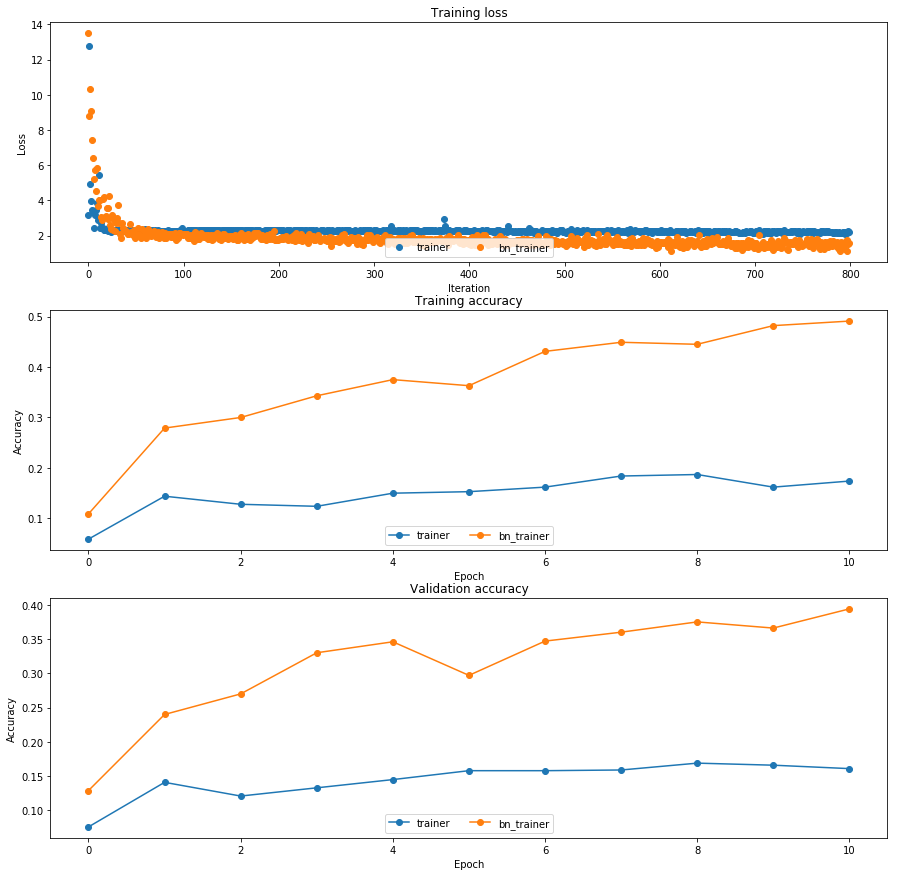

In [29]:
from utils import plot

plt.subplot(3, 1, 1)
plot('Training loss','Iteration', 'Loss', [trainer.loss_history, bn_trainer.loss_history], marker='o', 
     labels=['trainer', 'bn_trainer'])

plt.subplot(3, 1, 2)
plot('Training accuracy','Epoch', 'Accuracy', [trainer.train_acc_history, bn_trainer.train_acc_history], marker='-o',
     labels=['trainer', 'bn_trainer'])

plt.subplot(3, 1, 3)
plot('Validation accuracy','Epoch', 'Accuracy', [trainer.val_acc_history, bn_trainer.val_acc_history], marker='-o',
     labels=['trainer', 'bn_trainer'])

plt.gcf().set_size_inches(15, 15)
plt.show()

### Question: What do you see in the plots?

**Answer**:
When we use batch normalization the accuracy will be better obviosly in the plots.

## Problem 5. Dropout (8pts)

### 5.1. Dropout forward and backward pass

Open `layers.py` and implement `forward()` and `backward()` functions of `Dropout` class corresponding to forward and backward pass of inverted dropout.

As a sanity check run the following cell to see the outputs:

In [33]:
from layers import *

np.random.seed(42)

print('Train:')
x = np.random.randint(0, 6, (5, 5)).astype(np.float32)
print('x:\n', x)
p = 0.4
dropout = Dropout(p)
out = dropout.forward(x, mode='TRAIN')
print('forward pass out:\n', out)
dout = np.ones((5, 5))
dx = dropout.backward(dout)
print('backward pass dx:\n', dx)
print()


print('TEST:')
x = np.random.randint(0, 6, (5, 5)).astype(np.float32)
print('x:\n', x)
p = 0.4
dropout = Dropout(p)
out = dropout.forward(x, mode='TEST')
print('forward pass out:\n', out)
print('\n')

Train:
x:
 [[3. 4. 2. 4. 4.]
 [1. 2. 2. 2. 4.]
 [3. 2. 5. 4. 1.]
 [3. 5. 5. 1. 3.]
 [4. 0. 3. 1. 5.]]
forward pass out:
 [[ 7.5 10.   0.  10.  10. ]
 [ 0.   5.   5.   0.  10. ]
 [ 0.   0.   0.   0.   0. ]
 [ 7.5  0.   0.   2.5  7.5]
 [10.   0.   0.   0.   0. ]]
backward pass dx:
 [[1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0.]]

TEST:
x:
 [[2. 5. 0. 3. 1.]
 [3. 1. 5. 5. 5.]
 [1. 3. 5. 4. 1.]
 [1. 3. 1. 1. 5.]
 [3. 5. 5. 3. 0.]]
forward pass out:
 [[2. 5. 0. 3. 1.]
 [3. 1. 5. 5. 5.]
 [1. 3. 5. 4. 1.]
 [1. 3. 1. 1. 5.]
 [3. 5. 5. 3. 0.]]




### 5.2. Deep networks with Dropout

Let's train two models with and without dropout and compare them.

In [31]:
np.random.seed(42)

num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

trainers = {}
p_choices = [1, 0.25]

for p in p_choices:
    # Note that p is the probability of keeping a neuron active (not dropping it!). Therefore, p=1 means no dropout!
    trainer = None
    print('p =', p)
    np.random.seed(42)
    weight_scale = 1e-2
    model = MLP()
    model.add(FullyConnected(np.random.normal(0, weight_scale, (3072, 500)), np.zeros((500,))))
    model.add(Relu())
    model.add(Dropout(p))
    model.add(FullyConnected(np.random.normal(0, weight_scale, (500, 10)), np.zeros((10,))))
    model.add(SoftmaxCrossEntropy())

    trainer = Trainer(model, small_data, batch_size = 100, num_epochs = 25 ,update_rule = 'adam', optim_config = {"learning_rate":5e-4})
    trainer.train()
    #######################################################################################
    # TODO: build a model with the following architecture:                                #
    # 1) input layer with 3072 units                                                      #
    # 2) hidden layer with 500 units, followed by Relu, followed by dropout with p=p      #
    # 3) output layer with 10 units, followed by SoftmaxCrossEntropy                      #
    # set the weight_scale of fully connected layers to 1e-2.                             #
    # Initialize trainer as an instance of Trainer.                                       #
    # For the trainer:                                                                    #
    # pass the small_data as the data and set the update_rule to 'adam'.                  #
    # Set the learning_rate to 5e-4 and batch_size to 100 and num_epochs to 25.           #
    #######################################################################################
    pass
    ###################################################################################### 
    #                             END OF YOUR CODE                                       #
    ######################################################################################
    # storing the trainer object in the dictionary
    trainers[p] = trainer

p = 1
(Iteration 1 / 1000) loss: 9.038862
(Epoch 0 / 25) train acc: 18.30%; val_acc: 16.90%
(Epoch 1 / 25) train acc: 37.70%; val_acc: 27.20%
(Epoch 2 / 25) train acc: 45.10%; val_acc: 29.00%
(Iteration 101 / 1000) loss: 3.300731
(Epoch 3 / 25) train acc: 63.20%; val_acc: 36.20%
(Epoch 4 / 25) train acc: 67.90%; val_acc: 37.20%
(Epoch 5 / 25) train acc: 69.60%; val_acc: 37.10%
(Iteration 201 / 1000) loss: 1.292572
(Epoch 6 / 25) train acc: 74.60%; val_acc: 36.60%
(Epoch 7 / 25) train acc: 82.10%; val_acc: 40.70%
(Iteration 301 / 1000) loss: 0.669811
(Epoch 8 / 25) train acc: 87.60%; val_acc: 37.30%
(Epoch 9 / 25) train acc: 89.00%; val_acc: 39.70%
(Epoch 10 / 25) train acc: 88.60%; val_acc: 39.50%
(Iteration 401 / 1000) loss: 0.208812
(Epoch 11 / 25) train acc: 95.20%; val_acc: 40.60%
(Epoch 12 / 25) train acc: 93.20%; val_acc: 40.40%
(Iteration 501 / 1000) loss: 0.263487
(Epoch 13 / 25) train acc: 96.20%; val_acc: 40.10%
(Epoch 14 / 25) train acc: 96.40%; val_acc: 39.20%
(Epoch 15 / 2

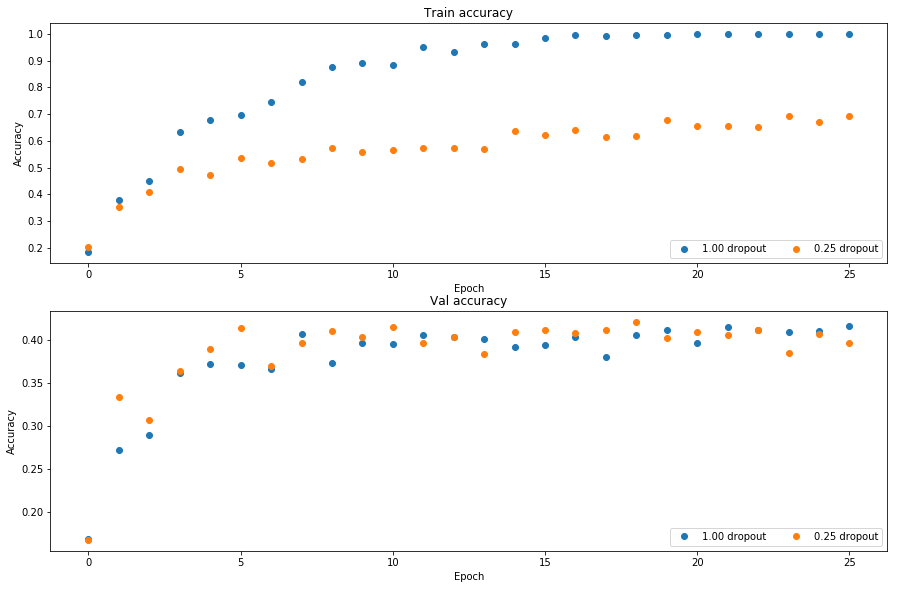

In [32]:
train_accs = []
val_accs = []
for p in p_choices:
    trainer = trainers[p]
    train_accs.append(trainer.train_acc_history[-1])
    val_accs.append(trainer.val_acc_history[-1])

plt.subplot(3, 1, 1)
for p in p_choices:
    plt.plot(trainers[p].train_acc_history, 'o', label='%.2f dropout' % p)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for p in p_choices:
    plt.plot(trainers[p].val_acc_history, 'o', label='%.2f dropout' % p)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

### Question: What do you see in the plots?

### Answer:
Dropout help to perevent overfitting and as we can see in the first plot, the train accuracy achieved 100% that means in this NN without dropout the algorithem overfitted.